In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import joblib

In [5]:
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [7]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
data.shape

(1000, 2)

In [9]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [10]:
data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [11]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [12]:
data['char_count']=data['Review'].apply(len)

In [13]:
data.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [14]:
data['word_count']=data['Review'].apply(lambda x :len(str(x).split()))

In [15]:
data.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Santhosh T
[nltk_data]     N\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
data['sent_count']=data['Review'].apply(lambda x : len(nltk.sent_tokenize(str(x))))

In [19]:
data.head()

,Review,Liked,char_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [20]:
data[data['Liked']==1]['char_count'].mean()

55.88

In [21]:
data[data['Liked']==0]['char_count'].mean()

60.75

In [22]:
import re

In [23]:
data['Review'][1]

'Crust is not good.'

In [24]:
review = re.sub('[^a-zA-Z]',' ',data['Review'][1])

In [25]:
review

'Crust is not good '

In [26]:
review = review.lower()

In [27]:
review

'crust is not good '

In [28]:
review = review.split()

In [29]:
review

['crust', 'is', 'not', 'good']

In [30]:
from nltk.corpus import stopwords

In [31]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Santhosh T
[nltk_data]     N\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
all_stopwords = stopwords.words("english")
all_stopwords.remove('not')

In [33]:
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
review = [word for word in review if word not in set(all_stopwords)]

In [35]:
review

['crust', 'not', 'good']

In [36]:
from nltk.stem.porter import PorterStemmer

In [37]:
ps = PorterStemmer()

In [38]:
review = [ps.stem(word) for word in review]

In [39]:
review = " ".join(review)

In [40]:
review

'crust not good'

In [41]:
import re
custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                    'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

corpus =[]
ps =PorterStemmer()
stop_words = set(stopwords.words("english")) - custom_stopwords

for i in range(len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    corpus.append(review)

In [42]:
data['processed_text']=corpus

In [43]:
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [44]:
from wordcloud import WordCloud

In [45]:
# pip install wordcloud


In [46]:
wc = WordCloud(width=500,height=500,min_font_size=8,background_color="white")

In [47]:
pos = wc.generate(data[data['Liked']==1]['processed_text'].str.cat(sep=" "))

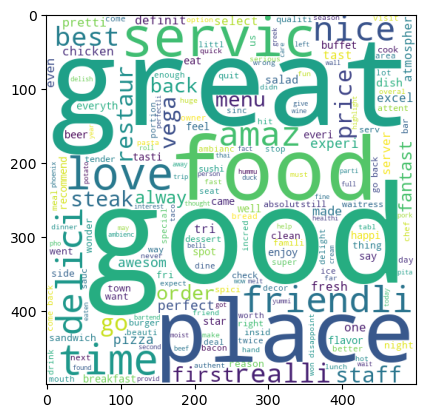

In [48]:
plt.imshow(pos)

In [49]:
negative = wc.generate(data[data['Liked']==0]['processed_text'].str.cat(sep=" "))

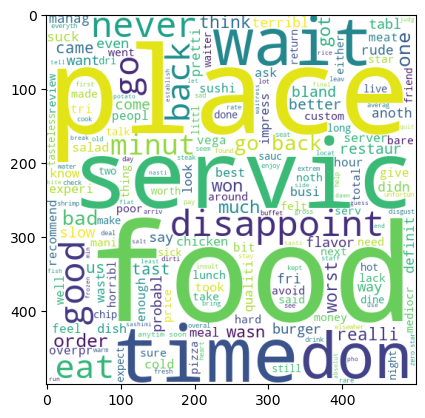

In [50]:
plt.imshow(negative)

In [51]:
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
cv = CountVectorizer(max_features=1500)

In [54]:
X = cv.fit_transform(corpus).toarray()

In [55]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
X.shape

(1000, 1500)

In [57]:
joblib.dump(cv,"count_v_res")

['count_v_res']

In [58]:
y = data['Liked']

In [59]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
nb =GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_test,y_pred)

0.68

In [66]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.79

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.805

In [68]:
import joblib

In [69]:
joblib.dump(rf,'Restaurant_review_model')

['Restaurant_review_model']

In [70]:
# GUI

In [ ]:
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import joblib
import re

class RestaurantReviewApp:
    def __init__(self, master):
        self.master = master
        master.title("Restaurant Review Classification App")
        master.geometry("500x400")  # Larger size for better layout

        # Load the pre-trained model and vectorizer
        self.model = joblib.load('Restaurant_review_model')
        self.vectorizer = joblib.load('count_v_res')

        # Set background color
        master.configure(bg="#f4f4f4")

        # Title with updated font and color
        title_font = ('Helvetica', 18, 'bold')
        self.label = ttk.Label(master, text="Enter your Restaurant Review:", font=title_font, background="#f4f4f4")
        self.label.pack(pady=20)

        # Text entry for review input
        self.text_entry = tk.Text(master, height=20, width=150, font=("Helvetica", 12))
        self.text_entry.pack(pady=10)

        # Styled button
        self.classify_button = ttk.Button(master, text="Classify Review", command=self.classify_review, style='Custom.TButton')
        self.classify_button.pack(pady=10)

        # Clear button
        self.clear_button = ttk.Button(master, text="Clear", command=self.clear_text, style='Custom.TButton')
        self.clear_button.pack(pady=5)

        # Result label and image placeholders
        self.result_label = ttk.Label(master, text="", font=("Helvetica", 14, 'bold'), background="#f4f4f4")
        self.result_label.pack(pady=20)
        
        self.image_label = tk.Label(master, bg="#f4f4f4")
        self.image_label.pack()

        # Button style
        self.style = ttk.Style()
        self.style.configure('Custom.TButton', font=('Helvetica', 14), width=20, foreground='black', background='#4CAF50', padding=(10, 5))
        self.style.map('Custom.TButton', foreground=[('pressed', 'black'), ('active', 'white')], background=[('pressed', '!disabled', '#45a049'), ('active', '#4CAF50')])

    def preprocess_text(self, text):
        custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                            'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                            'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                            'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
        ps = PorterStemmer()
        stop_words = set(stopwords.words("english")) - custom_stopwords

        review = re.sub('[^a-zA-Z]', ' ', text)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stop_words]
        review = " ".join(review)

        return review

    def classify_review(self):
        user_input = self.text_entry.get("1.0", "end-1c")
        if user_input:
            processed_input = self.preprocess_text(user_input)
            processed_input_vectorized = self.vectorizer.transform([processed_input])
            prediction = self.model.predict(processed_input_vectorized)[0]
            sentiment = "Positive" if prediction == 1 else "Negative"

            self.result_label.config(text=f"Predicted Sentiment: {sentiment}", foreground="green" if sentiment == "Positive" else "red")

            # Display corresponding image based on sentiment
            img_path = "positive.png" if sentiment == "Positive" else "negative.png"
            self.show_sentiment_image(img_path)
        else:
            self.result_label.config(text="Please enter a review before clicking 'Classify'.")

    def show_sentiment_image(self, img_path):
        # Load and display the image
        image = Image.open(img_path)
        image = image.resize((100, 100), Image.LANCZOS)  # Updated from ANTIALIAS to LANCZOS
        photo = ImageTk.PhotoImage(image)
        self.image_label.config(image=photo)
        self.image_label.image = photo  # Keep a reference to avoid garbage collection

    def clear_text(self):
        # Clear the text entry and result label
        self.text_entry.delete("1.0", "end")
        self.result_label.config(text="")
        self.image_label.config(image="")

if __name__ == "__main__":
    root = tk.Tk()
    app = RestaurantReviewApp(root)
    root.mainloop()
